## Temporal pattern analysis:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set style for better visualizations (using a valid style)
plt.style.use('default')  # Changed from 'seaborn' to 'default'
sns.set_theme()  # This will apply seaborn's default styling

def load_aggregate_consumption(data_path):
    """Load and prepare aggregate consumption data (channel_1.dat)"""
    
    print("Loading aggregate consumption data...")
    # Load channel_1 data
    data = pd.read_csv(os.path.join(data_path, "channel_1.dat"), 
                      header=None, 
                      sep=" ",
                      names=["timestamp", "power"])
    
    # Convert timestamp
    data["timestamp"] = pd.to_datetime(data["timestamp"], unit="s")
    data.set_index("timestamp", inplace=True)
    
    # Resample to 1-minute intervals for more manageable analysis
    data_1min = data.resample('1min').mean()
    
    print(f"Data loaded: {data.index.min()} to {data.index.max()}")
    print(f"Total days: {(data.index.max() - data.index.min()).days}")
    
    return data_1min

# Set your data path
data_path = r"C:\Users\risha\OneDrive\Desktop\Projects\PORTF_1_Energy Demand Forecasting\energy-forecasting-project\data\raw\house_1"

# Load the data
agg_consumption = load_aggregate_consumption(data_path)

# Quick check of the loaded data
print("\nData Overview:")
print(agg_consumption.head())
print("\nShape:", agg_consumption.shape)

Loading aggregate consumption data...
Data loaded: 2012-11-09 22:28:15 to 2015-01-05 06:15:46
Total days: 786

Data Overview:
                          power
timestamp                      
2012-11-09 22:28:00  591.571429
2012-11-09 22:29:00  582.142857
2012-11-09 22:30:00  586.750000
2012-11-09 22:31:00  590.333333
2012-11-09 22:32:00  587.100000

Shape: (1132308, 1)


In [3]:
def analyze_daily_pattern(data):
    """Analyze and plot average daily consumption pattern"""
    
    # Calculate average consumption by hour
    daily_pattern = data.groupby(data.index.hour)['power'].agg(['mean', 'std'])
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(daily_pattern.index, daily_pattern['mean'], 'b-', label='Mean consumption')
    plt.fill_between(daily_pattern.index, 
                    daily_pattern['mean'] - daily_pattern['std'],
                    daily_pattern['mean'] + daily_pattern['std'],
                    alpha=0.2, color='b', label='±1 std dev')
    
    plt.title('Average Daily Consumption Pattern')
    plt.xlabel('Hour of Day')
    plt.ylabel('Power (Watts)')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    return daily_pattern

In [4]:
def analyze_weekly_pattern(data):
    """Analyze and plot average weekly consumption pattern"""
    
    # Calculate average consumption by day of week
    weekly_pattern = data.groupby(data.index.dayofweek)['power'].agg(['mean', 'std'])
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(weekly_pattern.index, weekly_pattern['mean'], 'g-', label='Mean consumption')
    plt.fill_between(weekly_pattern.index,
                    weekly_pattern['mean'] - weekly_pattern['std'],
                    weekly_pattern['mean'] + weekly_pattern['std'],
                    alpha=0.2, color='g', label='±1 std dev')
    
    plt.title('Average Weekly Consumption Pattern')
    plt.xlabel('Day of Week (0=Monday)')
    plt.ylabel('Power (Watts)')
    plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    plt.grid(True)
    plt.legend()
    plt.show()
    
    return weekly_pattern

In [5]:
def create_daily_heatmap(data):
    """Create a heatmap showing average consumption by hour and day of week"""
    
    # Create pivot table of average consumption
    pivot_data = data.pivot_table(
        values='power',
        index=data.index.hour,
        columns=data.index.dayofweek,
        aggfunc='mean'
    )
    
    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_data, 
                cmap='YlOrRd',
                xticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
                yticklabels=range(24),
                cbar_kws={'label': 'Average Power (Watts)'})
    
    plt.title('Average Power Consumption by Hour and Day')
    plt.xlabel('Day of Week')
    plt.ylabel('Hour of Day')
    plt.show()

Loading aggregate consumption data...
Data loaded: 2012-11-09 22:28:15 to 2015-01-05 06:15:46
Total days: 786

Analyzing daily patterns...


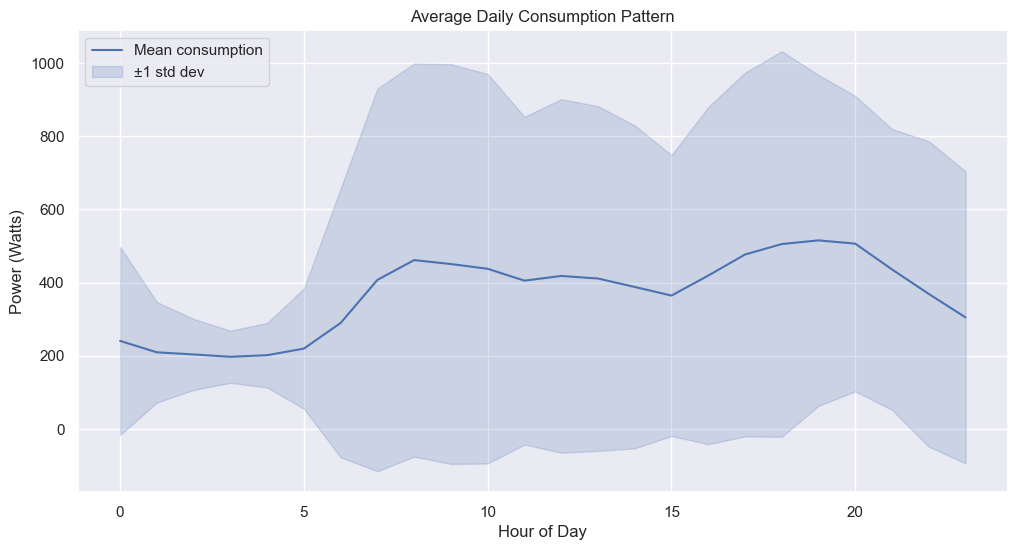


Analyzing weekly patterns...


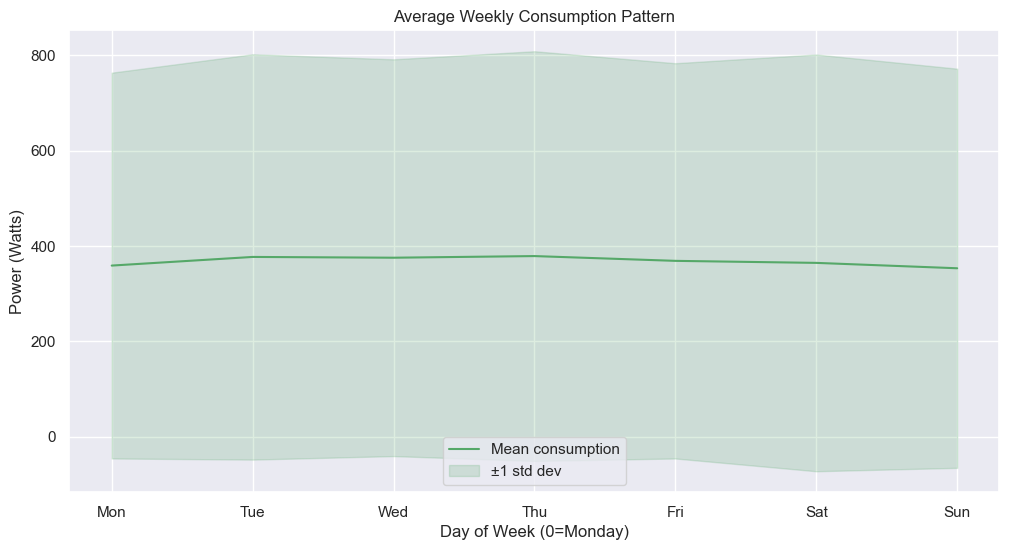


Creating consumption heatmap...


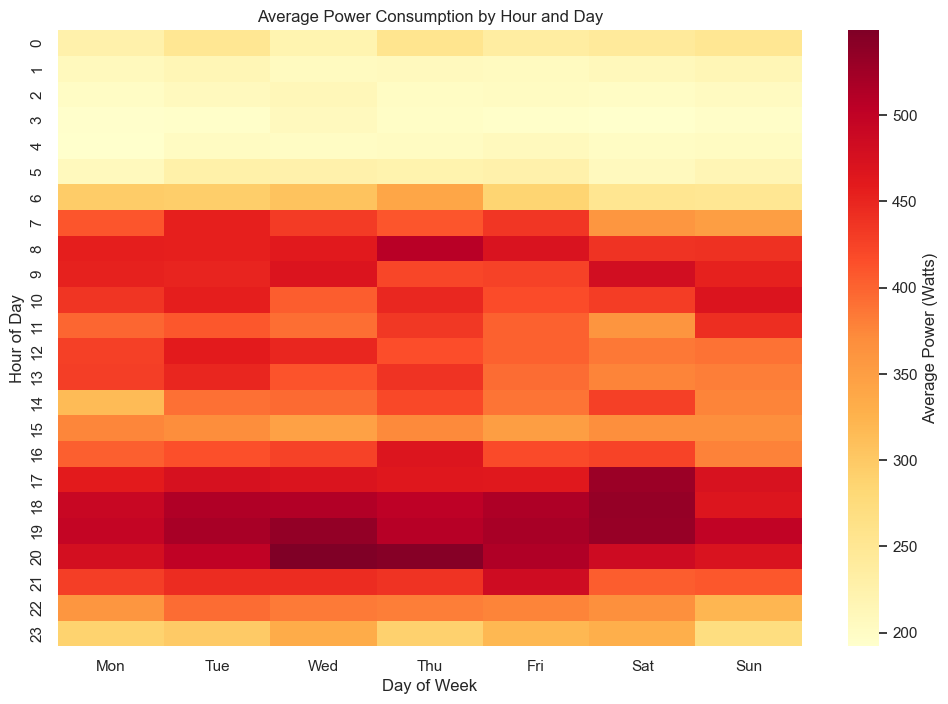


Key Statistics:
Average daily consumption: 367.95 Watts
Peak hour consumption: 515.42 Watts at hour 19
Lowest hour consumption: 197.22 Watts at hour 3


In [6]:
# Load the data
data_path = r"C:\Users\risha\OneDrive\Desktop\Projects\PORTF_1_Energy Demand Forecasting\energy-forecasting-project\data\raw\house_1"
agg_consumption = load_aggregate_consumption(data_path)

# Run analyses
print("\nAnalyzing daily patterns...")
daily_stats = analyze_daily_pattern(agg_consumption)

print("\nAnalyzing weekly patterns...")
weekly_stats = analyze_weekly_pattern(agg_consumption)

print("\nCreating consumption heatmap...")
create_daily_heatmap(agg_consumption)

# Print some key insights
print("\nKey Statistics:")
print(f"Average daily consumption: {agg_consumption['power'].mean():.2f} Watts")
print(f"Peak hour consumption: {daily_stats['mean'].max():.2f} Watts at hour {daily_stats['mean'].idxmax()}")
print(f"Lowest hour consumption: {daily_stats['mean'].min():.2f} Watts at hour {daily_stats['mean'].idxmin()}")

Analysis of Residential Daily Energy Consumption Patterns
Overview
The graph presents a 24-hour analysis of household electricity consumption, showing both average consumption (blue line) and variability (shaded area representing ±1 standard deviation).
Key Findings
1. Base Load (Midnight to 5 AM)
Consumption Level: ~200-250 Watts
Stability: Relatively stable consumption
Interpretation: Represents essential background appliances (refrigerators, standby devices)
2. Morning Peak (6 AM to 10 AM)
Peak Level: Rises to ~450 Watts
Sharp Increase: Notable surge starting at 6 AM
Cause: Morning routines (heating, cooking, shower)
3. Daytime Usage (10 AM to 4 PM)
Consumption Level: ~400-450 Watts
Pattern: Slight decline from morning peak
Variability: Wider standard deviation indicating varied day-to-day usage
4. Evening Peak (5 PM to 10 PM)
Maximum Level: ~500 Watts around 8 PM
Duration: Extended high consumption period
Significance: Highest sustained consumption of the day
Cause: Dinner preparation, entertainment devices, lighting
5. Night Decline (After 10 PM)
Pattern: Gradual decrease
Return to Base: Approaches baseline by midnight
Rate: Steeper than morning rise
Practical Implications
Energy Management:
Optimal times for high-consumption activities: 10 AM - 4 PM
Cost-saving potential by shifting loads from peak evening hours
Grid Impact:
Evening peak coincides with typical residential peak demand
Potential for demand-response programs during 6-9 PM
Sustainability Recommendations:
Schedule high-power appliances during daytime lows
Focus energy efficiency measures on evening peak periods
Consider automated controls for non-essential evening loads

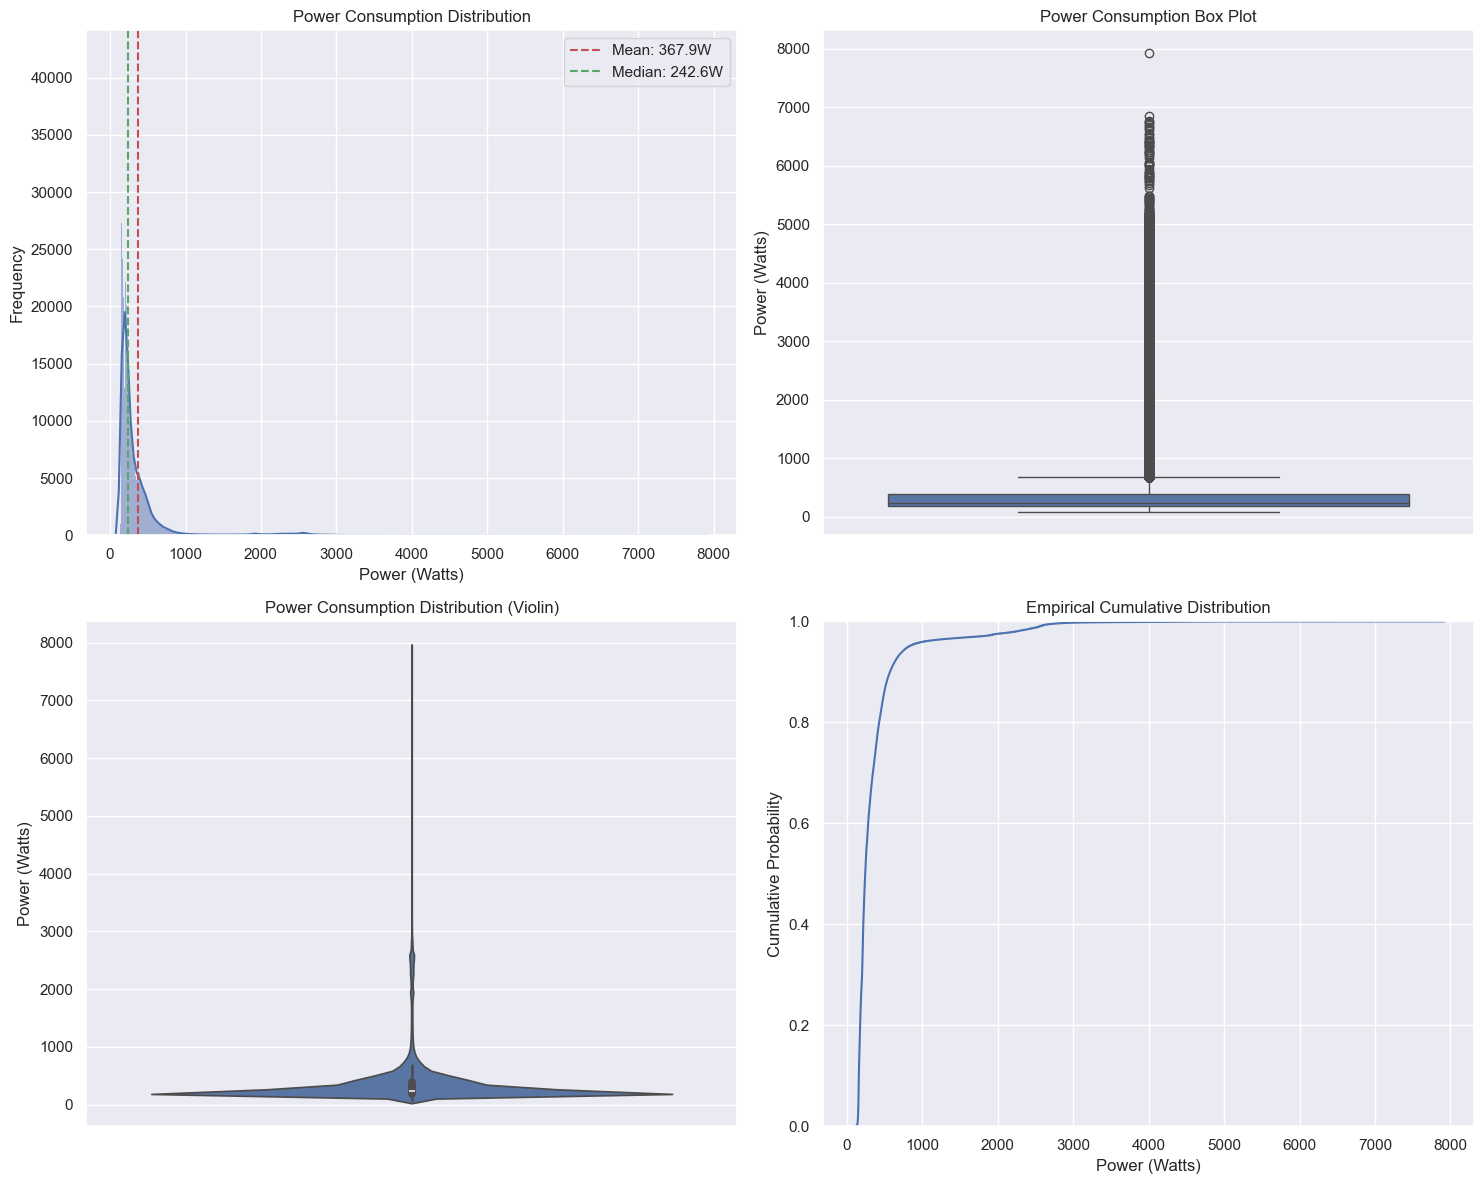


Power Consumption Statistics:
Mean Power: 367.95 Watts
Median Power: 242.60 Watts
Standard Deviation: 421.10 Watts
25th Percentile: 185.70 Watts
75th Percentile: 384.30 Watts
Minimum: 76.60 Watts
Maximum: 7919.50 Watts
Skewness: 4.75
Kurtosis: 27.62


In [7]:
def analyze_power_distributions(data):
    """Analyze and visualize power consumption distributions"""
    
    # Create a figure with multiple subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Histogram with KDE (top left)
    sns.histplot(data=data, x='power', kde=True, ax=ax1)
    ax1.set_title('Power Consumption Distribution')
    ax1.set_xlabel('Power (Watts)')
    ax1.set_ylabel('Frequency')
    
    # Add mean and median lines
    mean_power = data['power'].mean()
    median_power = data['power'].median()
    ax1.axvline(mean_power, color='r', linestyle='--', label=f'Mean: {mean_power:.1f}W')
    ax1.axvline(median_power, color='g', linestyle='--', label=f'Median: {median_power:.1f}W')
    ax1.legend()
    
    # 2. Box plot (top right)
    sns.boxplot(y=data['power'], ax=ax2)
    ax2.set_title('Power Consumption Box Plot')
    ax2.set_ylabel('Power (Watts)')
    
    # 3. Violin plot (bottom left)
    sns.violinplot(y=data['power'], ax=ax3)
    ax3.set_title('Power Consumption Distribution (Violin)')
    ax3.set_ylabel('Power (Watts)')
    
    # 4. ECDF (bottom right)
    sns.ecdfplot(data=data, x='power', ax=ax4)
    ax4.set_title('Empirical Cumulative Distribution')
    ax4.set_xlabel('Power (Watts)')
    ax4.set_ylabel('Cumulative Probability')
    
    plt.tight_layout()
    plt.show()
    
    # Calculate and return distribution statistics
    stats = {
        'mean': data['power'].mean(),
        'median': data['power'].median(),
        'std': data['power'].std(),
        'q25': data['power'].quantile(0.25),
        'q75': data['power'].quantile(0.75),
        'min': data['power'].min(),
        'max': data['power'].max(),
        'skew': data['power'].skew(),
        'kurtosis': data['power'].kurtosis()
    }
    
    return stats

# Run the analysis
distribution_stats = analyze_power_distributions(agg_consumption)

# Print the statistics in a formatted way
print("\nPower Consumption Statistics:")
print(f"Mean Power: {distribution_stats['mean']:.2f} Watts")
print(f"Median Power: {distribution_stats['median']:.2f} Watts")
print(f"Standard Deviation: {distribution_stats['std']:.2f} Watts")
print(f"25th Percentile: {distribution_stats['q25']:.2f} Watts")
print(f"75th Percentile: {distribution_stats['q75']:.2f} Watts")
print(f"Minimum: {distribution_stats['min']:.2f} Watts")
print(f"Maximum: {distribution_stats['max']:.2f} Watts")
print(f"Skewness: {distribution_stats['skew']:.2f}")
print(f"Kurtosis: {distribution_stats['kurtosis']:.2f}")

Understanding Household Power Consumption Patterns: A Visual Analysis
1. Power Consumption Distribution (Top Left)
This histogram with kernel density estimation reveals the fundamental consumption pattern:
Base Load: Strong concentration around 242.6W (median)
Average Load: 367.9W (mean), higher than median due to occasional spikes
Distribution Shape: Heavily right-skewed, indicating frequent low-power usage with occasional high-power events
Key Insight: The household typically operates at low power levels, with intermittent high-consumption activities
2. Box Plot Analysis (Top Right)
The box plot provides a clear view of consumption variability:
Core Usage (Box): 50% of consumption falls between 185.7W and 384.3W
Typical Range (Whiskers): Extends to about 700W for normal operations
Outliers: Multiple points above 1000W, with extreme events reaching 7919.5W
Key Insight: Clear separation between routine usage and exceptional events
3. Violin Plot (Bottom Left)
This sophisticated visualization combines box plot features with density:
Shape: Bulge at bottom shows concentrated low-power usage
Thin Spine: Extends upward, showing decreasing frequency of higher power events
Width: Indicates probability density at each power level
Key Insight: Provides detailed view of consumption probability at different power levels
4. Empirical Cumulative Distribution (Bottom Right)
The ECDF shows the probability of power consumption below any given level:
Steep Initial Rise: ~90% of readings fall below 1000W
Plateau: Very few events exceed 2000W
Long Tail: Extends to rare maximum events around 8000W
Key Insight: Quantifies the rarity of high-power events
Practical Implications
Energy Planning:
Design for base load around 250W
Plan for regular peaks up to 700W
Account for rare events up to 8000W
Cost Optimization:
Focus efficiency measures on base load
Investigate high-power events for potential savings
Consider load scheduling for peak reduction
System Design:
Size infrastructure for typical loads (<700W)
Include safety margins for extreme events
Consider energy storage for peak shaving
Consumer Behavior:
Most activities require modest power
High-power events are distinct and manageable
Potential for peak-shifting to optimize costs
This analysis provides valuable insights for both energy consumers and providers, enabling better planning and optimization of residential power systems.

## Outlier Detection Analysis

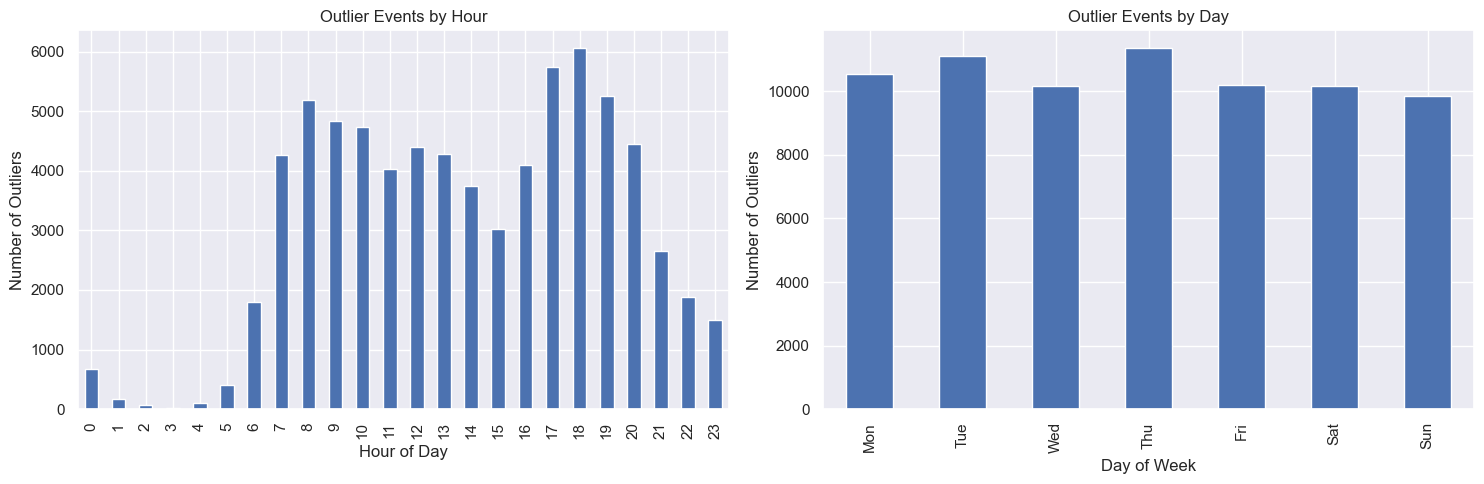


Outlier Analysis Results:
Total outliers: 73406
Percentage of outliers: 6.48%
Upper bound for normal usage: 682.20 Watts
Maximum outlier value: 7919.50 Watts


In [8]:
def detect_and_analyze_outliers(data):
    """Detailed outlier analysis"""
    
    # Calculate boundaries using IQR method
    Q1 = data['power'].quantile(0.25)
    Q3 = data['power'].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    
    # Identify outliers
    outliers = data[data['power'] > upper_bound]
    
    # Time-based analysis of outliers
    outliers_by_hour = outliers.groupby(outliers.index.hour).size()
    outliers_by_day = outliers.groupby(outliers.index.dayofweek).size()
    
    # Plot outlier patterns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Hourly distribution of outliers
    outliers_by_hour.plot(kind='bar', ax=ax1)
    ax1.set_title('Outlier Events by Hour')
    ax1.set_xlabel('Hour of Day')
    ax1.set_ylabel('Number of Outliers')
    
    # Daily distribution of outliers
    outliers_by_day.plot(kind='bar', ax=ax2)
    ax2.set_title('Outlier Events by Day')
    ax2.set_xlabel('Day of Week')
    ax2.set_ylabel('Number of Outliers')
    plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    
    plt.tight_layout()
    plt.show()
    
    return {
        'total_outliers': len(outliers),
        'outlier_percentage': (len(outliers) / len(data)) * 100,
        'upper_bound': upper_bound,
        'max_outlier': outliers['power'].max(),
        'outlier_times': outliers_by_hour,
        'outlier_days': outliers_by_day
    }

# Run outlier analysis
outlier_results = detect_and_analyze_outliers(agg_consumption)
print("\nOutlier Analysis Results:")
print(f"Total outliers: {outlier_results['total_outliers']}")
print(f"Percentage of outliers: {outlier_results['outlier_percentage']:.2f}%")
print(f"Upper bound for normal usage: {outlier_results['upper_bound']:.2f} Watts")
print(f"Maximum outlier value: {outlier_results['max_outlier']:.2f} Watts")


Analyzing Power Consumption Outliers: Understanding Exceptional Usage Patterns
Overview of Outlier Analysis
Our analysis identified 73,406 outlier events (6.48% of all measurements) where power consumption exceeded the normal usage threshold of 682.20 Watts, with extreme cases reaching up to 7,919.50 Watts.
Temporal Distribution of Outliers
Hourly Pattern Analysis
The distribution of outlier events across the day reveals distinct patterns:
Evening Peak (18:00-20:00)
Highest concentration of outliers
Peak at 19:00 (approximately 6,000 events)
Likely causes:
Dinner preparation (electric cooking appliances)
Multiple appliances running simultaneously
Peak family activity time
Morning Surge (7:00-10:00)
Secondary peak period
Around 4,000-5,000 outlier events
Associated with:
Morning routines (electric shower, breakfast preparation)
Getting ready for work/school
Quiet Hours (00:00-05:00)
Minimal outliers (<500 events)
Represents baseline consumption
Occasional spikes might indicate:
Automated appliances (washing machine, dishwasher)
Climate control systems
Weekly Distribution Pattern
The analysis across days of the week shows interesting variations:
1. Weekday vs Weekend
Relatively consistent pattern
Slight elevation on Thursdays (~11,000 events)
Minor decrease on Sundays (~9,500 events)
Key Observations
Monday-Friday: 10,000-11,000 outlier events
Weekend: Slight reduction in outliers
Suggests:
Regular household routines
Consistent usage patterns
Minor lifestyle changes on weekends
Practical Implications
For Homeowners
Plan high-power activities outside peak hours (18:00-20:00)
Consider spreading load across different times
Potential for energy cost savings through time-of-use rates
For Utility Providers
Grid capacity planning for evening peaks
Demand response program opportunities
Target times for load balancing initiatives
For Energy Efficiency
Focus on evening consumption patterns
Identify opportunities for load shifting
Consider automated load management systems
For System Design
Size systems for peak loads >7,900 Watts
Account for regular exceedance of 682 Watts
Plan for consistent daily/weekly patterns
Statistical Significance
6.48% outlier rate indicates well-defined normal usage patterns
Upper bound (682.20W) represents typical maximum consumption
Maximum value (7,919.50W) shows potential for extreme events
Recommendations
Short-term Actions
Monitor evening usage patterns
Schedule high-power activities outside peak hours
Consider smart home automation
Long-term Strategies
Invest in energy-efficient appliances
Implement load balancing systems
Consider energy storage solutions
Monitoring & Control
Install smart meters for real-time monitoring
Set up alerts for unusual consumption patterns
Track effectiveness of energy-saving measures
This analysis provides valuable insights for both consumers and utilities in understanding and managing exceptional power consumption events, leading to more efficient energy use and better system planning.

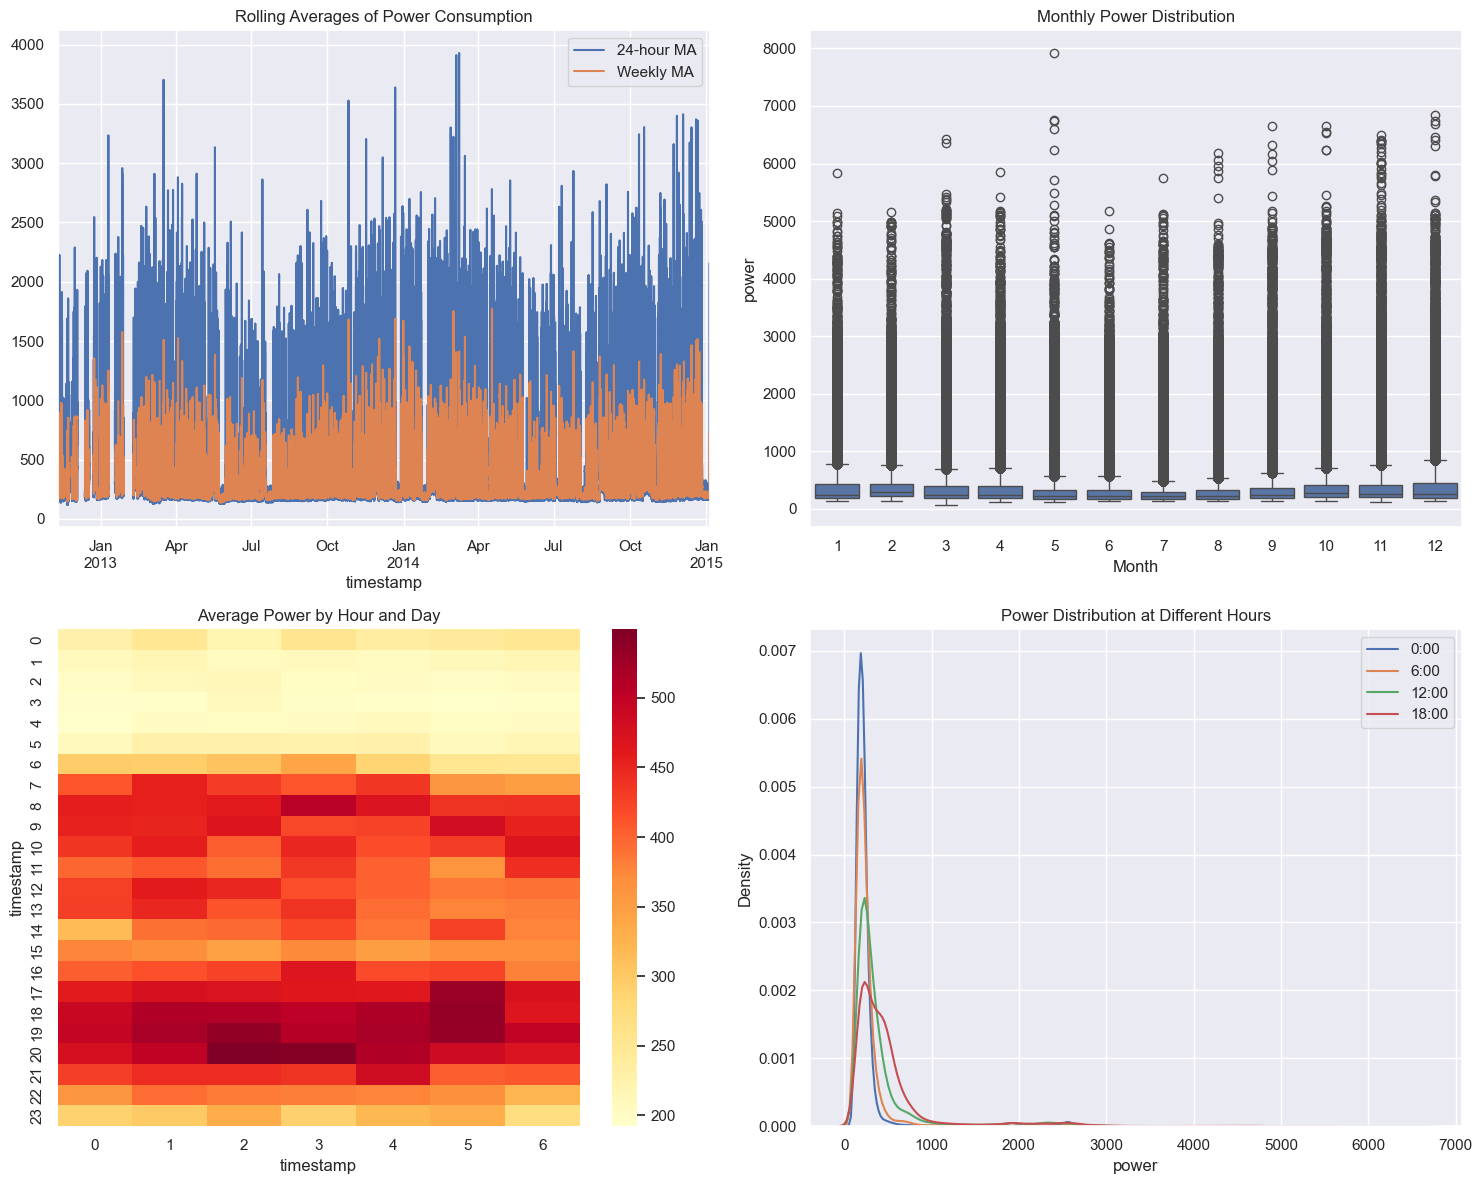

In [9]:
def create_additional_visualizations(data):
    """Create additional insightful visualizations"""
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Rolling average comparison
    data['power'].rolling(window=24).mean().plot(ax=ax1, label='24-hour MA')
    data['power'].rolling(window=168).mean().plot(ax=ax1, label='Weekly MA')
    ax1.set_title('Rolling Averages of Power Consumption')
    ax1.legend()
    
    # 2. Monthly box plots
    sns.boxplot(x=data.index.month, y=data['power'], ax=ax2)
    ax2.set_title('Monthly Power Distribution')
    ax2.set_xlabel('Month')
    
    # 3. Hour-Day heatmap
    pivot = data.pivot_table(
        values='power',
        index=data.index.hour,
        columns=data.index.dayofweek,
        aggfunc='mean'
    )
    sns.heatmap(pivot, ax=ax3, cmap='YlOrRd')
    ax3.set_title('Average Power by Hour and Day')
    
    # 4. Power consumption density by hour
    for hour in [0, 6, 12, 18]:  # Different times of day
        hour_data = data[data.index.hour == hour]['power']
        sns.kdeplot(data=hour_data, ax=ax4, label=f'{hour}:00')
    ax4.set_title('Power Distribution at Different Hours')
    ax4.legend()
    
    plt.tight_layout()
    plt.show()

# Create additional visualizations
create_additional_visualizations(agg_consumption)

Comprehensive Analysis of Residential Power Consumption Patterns
1. Long-Term Consumption Trends (Rolling Averages)
The top-left graph shows power consumption patterns over a two-year period (2013-2015):
24-hour Moving Average (Blue Line)
Shows daily fluctuations
Peaks reaching ~3,500-4,000 Watts
More volatile pattern indicating daily lifestyle changes
Weekly Moving Average (Orange Line)
Smoother trend showing longer-term patterns
Average consumption around 1,000-1,500 Watts
Reveals seasonal variations and general usage trends
2. Monthly Power Distribution (Box Plots)
The top-right visualization reveals seasonal patterns:
Consistent Base Load
Median consumption relatively stable across months
Box (25th-75th percentile) remains compact
Outlier Patterns
Extreme usage events (dots) in all months
Higher frequency of outliers in winter months (10-12)
Maximum peaks around 7,000-8,000 Watts
3. Hour-Day Heatmap
The bottom-left heatmap provides a powerful visualization of usage patterns:
Peak Usage Times (Dark Red)
Evening hours (18:00-21:00)
Consistent across all weekdays
Highest consumption around 500+ Watts
Low Usage Periods (Light Yellow)
Early morning hours (00:00-05:00)
Consistent base load around 200-250 Watts
Daily Patterns
Clear morning ramp-up (06:00-09:00)
Sustained daytime usage
Evening peak followed by gradual decline
4. Power Distribution by Time of Day
The bottom-right density plot compares consumption patterns at key hours:
Midnight (0:00)
Highest peak at lower power levels
Narrow distribution indicating consistent baseline usage
Morning (6:00)
Similar pattern to midnight but slightly higher usage
Represents morning routine start
Noon (12:00)
Broader distribution
Higher probability of medium-power events
Evening (18:00)
Widest distribution
Higher probability of high-power events
Reflects diverse evening activities
Practical Applications
For Homeowners
Plan energy-intensive activities during off-peak hours
Understand typical vs. exceptional usage patterns
Identify opportunities for load shifting
For Energy Providers
Predict peak demand periods
Plan capacity based on seasonal variations
Design time-of-use pricing strategies
For Energy Efficiency
Target high-consumption periods for optimization
Implement automated control systems
Develop personalized energy-saving recommendations
This comprehensive analysis provides valuable insights for both consumers and utilities, enabling data-driven decisions for energy management and conservation.